In [10]:
import plotly.express as px
import pandas as pd
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')

fig_losses = px.line(tot_losses,x = 'epoch',y='loss',color = 'set',facet_col='model',width = 2600)
#fig_losses.update_traces(mode="markers+lines", hovertemplate=None)
#fig_losses.update_layout(hovermode="x unified")
fig_losses.update_layout(title = {'text':f'Losses', 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    
fig_losses

In [11]:
tot_losses

Unnamed: 0  epoch         set      loss                    model
0              0      0    val_loss  0.315952       patchtst_weather_1
1              1      1    val_loss  0.348371       patchtst_weather_1
2              2      2    val_loss  0.283055       patchtst_weather_1
3              3      3    val_loss  0.268251       patchtst_weather_1
4              4      4    val_loss  0.307881       patchtst_weather_1
...          ...    ...         ...       ...                      ...
4587        4587    494  train_loss -2.824525  dilated_conv_vae_test_1
4588        4588    495  train_loss -2.824328  dilated_conv_vae_test_1
4589        4589    496  train_loss -2.828306  dilated_conv_vae_test_1
4590        4590    497  train_loss -2.828372  dilated_conv_vae_test_1
4591        4591    498  train_loss -2.827722  dilated_conv_vae_test_1

[4592 rows x 5 columns]

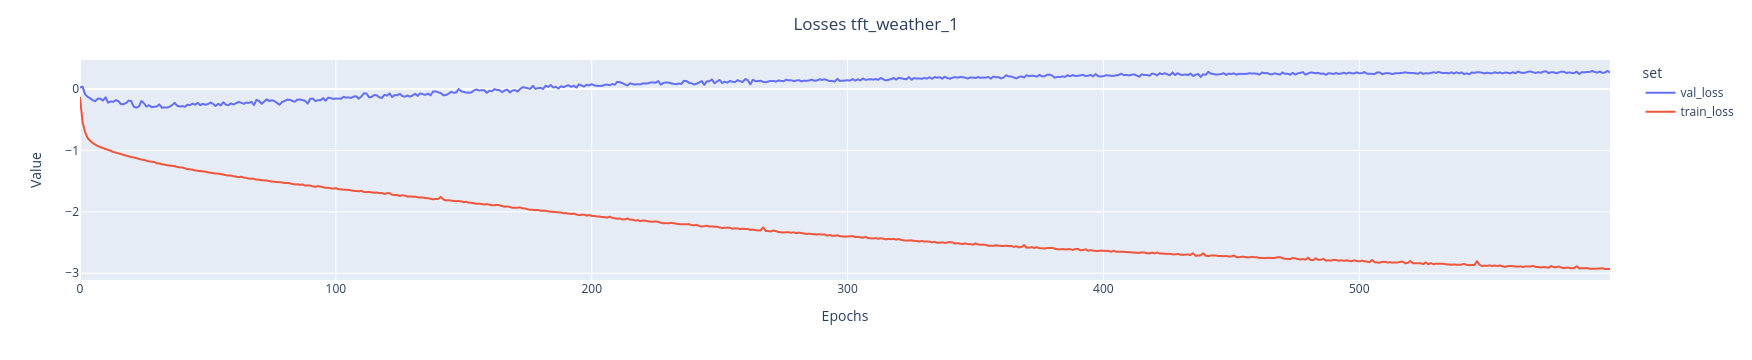

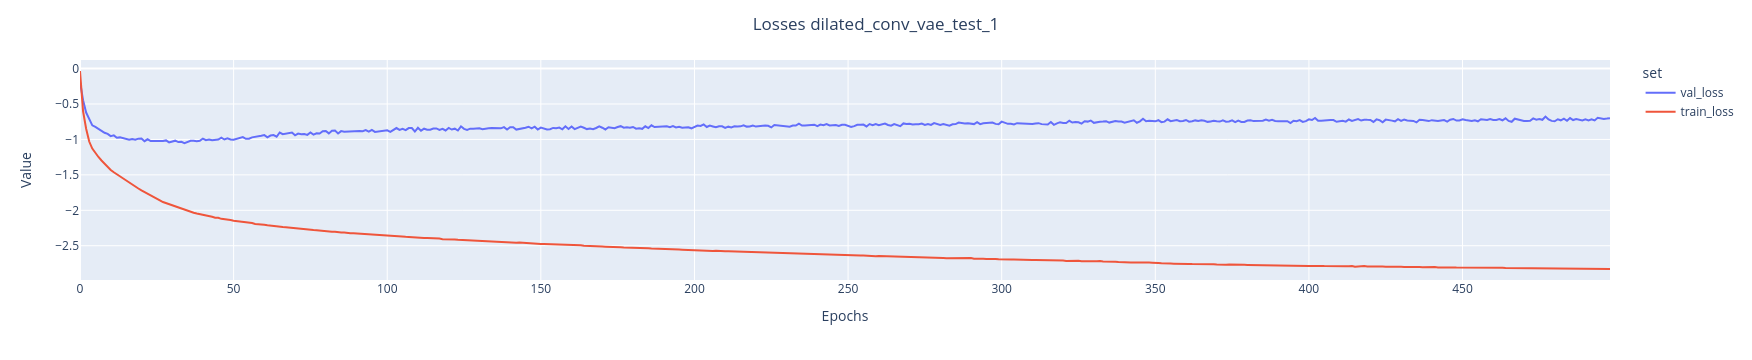

In [12]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')

for c in tot_losses.model.unique():
    fig_losses = px.line(tot_losses[tot_losses.model==c],x = 'epoch',y='loss',color = 'set')
    fig_losses.update_layout(title = {'text':f'Losses '+c, 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    fig_losses.show()

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)
#tot_pred.y_median[tot_pred.model=='d3vae_weather_1'] = tot_pred.y_pred[tot_pred.model=='d3vae_weather_1']
#tot_pred.y_median[tot_pred.model=='persistent_weather_1'] = tot_pred.y_pred[tot_pred.model=='persistent_weather_1']

In [6]:
try:
    tot_pred.y_pred[pd.isnull(tot_pred.y_pred)] = tot_pred.y_median[pd.isnull(tot_pred.y_pred)] 
except:
    tot_pred['y_pred'] = tot_pred.y_median.values

AttributeError: 'DataFrame' object has no attribute 'y_median'

In [7]:
tot_pred.lag.max()

64

In [8]:
lag=17
fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='y_pred', color='model',height=800)
fig.add_scatter(x = tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].time, y=tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].y)


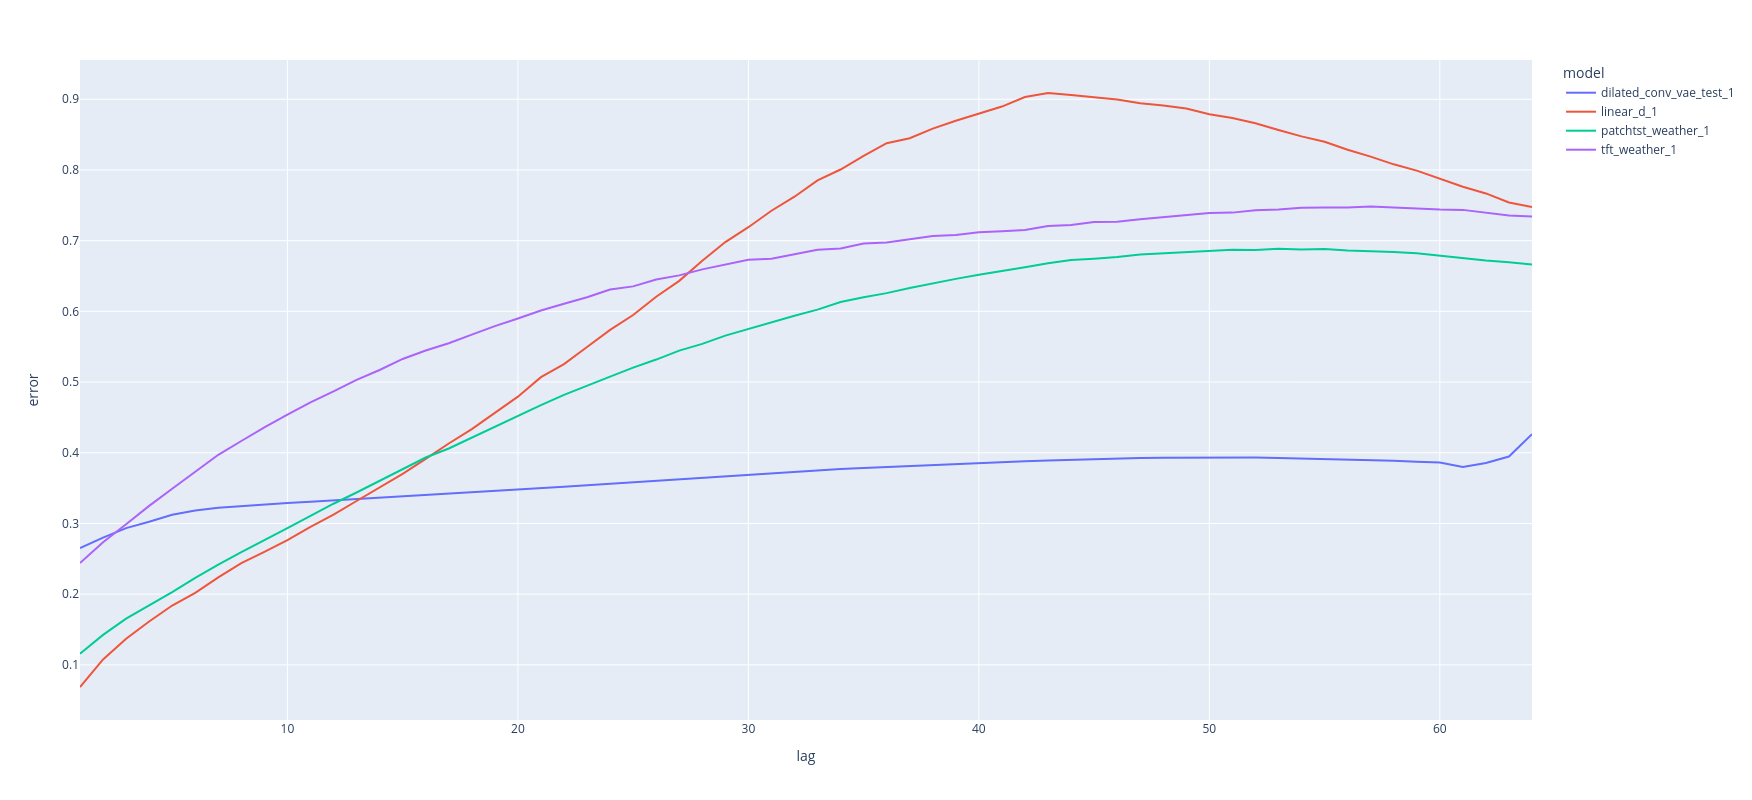

In [9]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean(np.abs(x.y-x.y_pred))).reset_index().rename(columns={0:'error'}) 
import numpy as np
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show() #150--400

In [6]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean(np.abs(x.y-x.y_pred))).reset_index().rename(columns={0:'error'}) 
import numpy as np
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show() #150--400

In [8]:
error.groupby('model').error.mean()

model
dilated_conv_vae_test_1    0.492419
linear_d_1                 0.630222
patchtst_weather_1         0.519284
tft_weather_1              0.650788
Name: error, dtype: float64

In [9]:
tot_pred = tot_pred.reset_index().drop(columns = ['index','Unnamed: 0'])

In [10]:
tot_pred.model.unique()

array(['patchtst_weather_1', 'dilated_conv_vae_test_1', 'tft_weather_1',
       'linear_d_1'], dtype=object)

In [11]:
persistence = tot_pred[(tot_pred.model==tot_pred.model.unique()[0]) & (tot_pred.lag==1) ].drop_duplicates()
persistence = persistence[['prediction_time','y_pred']].rename(columns={'y_pred':'y_prec'}).reset_index()[['prediction_time','y_prec']]


In [12]:
persistence

prediction_time    y_prec
0      2020-10-20 05:50:00  0.550744
1      2020-10-20 06:00:00  0.363783
2      2020-10-20 06:10:00  0.291070
3      2020-10-20 06:20:00  0.251094
4      2020-10-20 06:30:00  0.264579
...                    ...       ...
10408  2020-12-31 12:30:00  0.093524
10409  2020-12-31 12:40:00  0.126511
10410  2020-12-31 12:50:00  0.083615
10411  2020-12-31 13:00:00  0.047376
10412  2020-12-31 13:10:00  0.047103

[10413 rows x 2 columns]

In [13]:
tot_pred_new = pd.merge(tot_pred,persistence,on='prediction_time',how='left')

In [14]:
tot_pred_new = tot_pred_new.sort_values(by=['prediction_time','model','lag'])

In [15]:
tot_pred_new_prec = tot_pred_new[tot_pred_new.model == tot_pred_new.model.values[0]]

In [16]:
tot_pred_new_prec.model = 'persistent'
tot_pred_new_prec.y_pred = tot_pred_new_prec.y_prec
tot_pred_new = pd.concat([tot_pred_new,tot_pred_new_prec],ignore_index=True)

/tmp/ipykernel_165640/1064679427.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_165640/1064679427.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
WEIGHT = 1
def compute(x,alpha=1):

    try:
        prec = x.y_prec[x.lag==1].values[0]
    except:
        return None,None
    #prec = x.y_pred.values.mean()
    error = np.abs(x.y_pred.values-x.y.values)
    scostamento_persistente = np.abs(x.y_pred.values-prec)


    return error.mean(),scostamento_persistente.mean(),(error*(1+WEIGHT*np.exp(-scostamento_persistente))).mean()

def compute_fun(x):
    error, scostamento, tot_error = compute(x)
    return pd.Series({'error':error if error is not None else np.nan, 
                      'error_p':scostamento if scostamento is not None else np.nan,
                      'error_tot':tot_error if tot_error is not None else np.nan})

In [18]:
agg = tot_pred_new.groupby(['prediction_time','model']).apply(compute_fun).reset_index().dropna()


In [19]:
pd.set_option('display.max_colwidth', None)

agg.groupby('model')[['error','error_p','error_tot']].mean().reset_index().sort_values(by='error_p')

model     error   error_p  error_tot
3               persistent  0.481876  0.000000   0.963752
2       patchtst_weather_1  0.519284  0.306347   0.862725
0  dilated_conv_vae_test_1  0.492419  0.542341   0.768098
1               linear_d_1  0.630222  0.580579   0.923996
4            tft_weather_1  0.650788  0.596923   0.959384

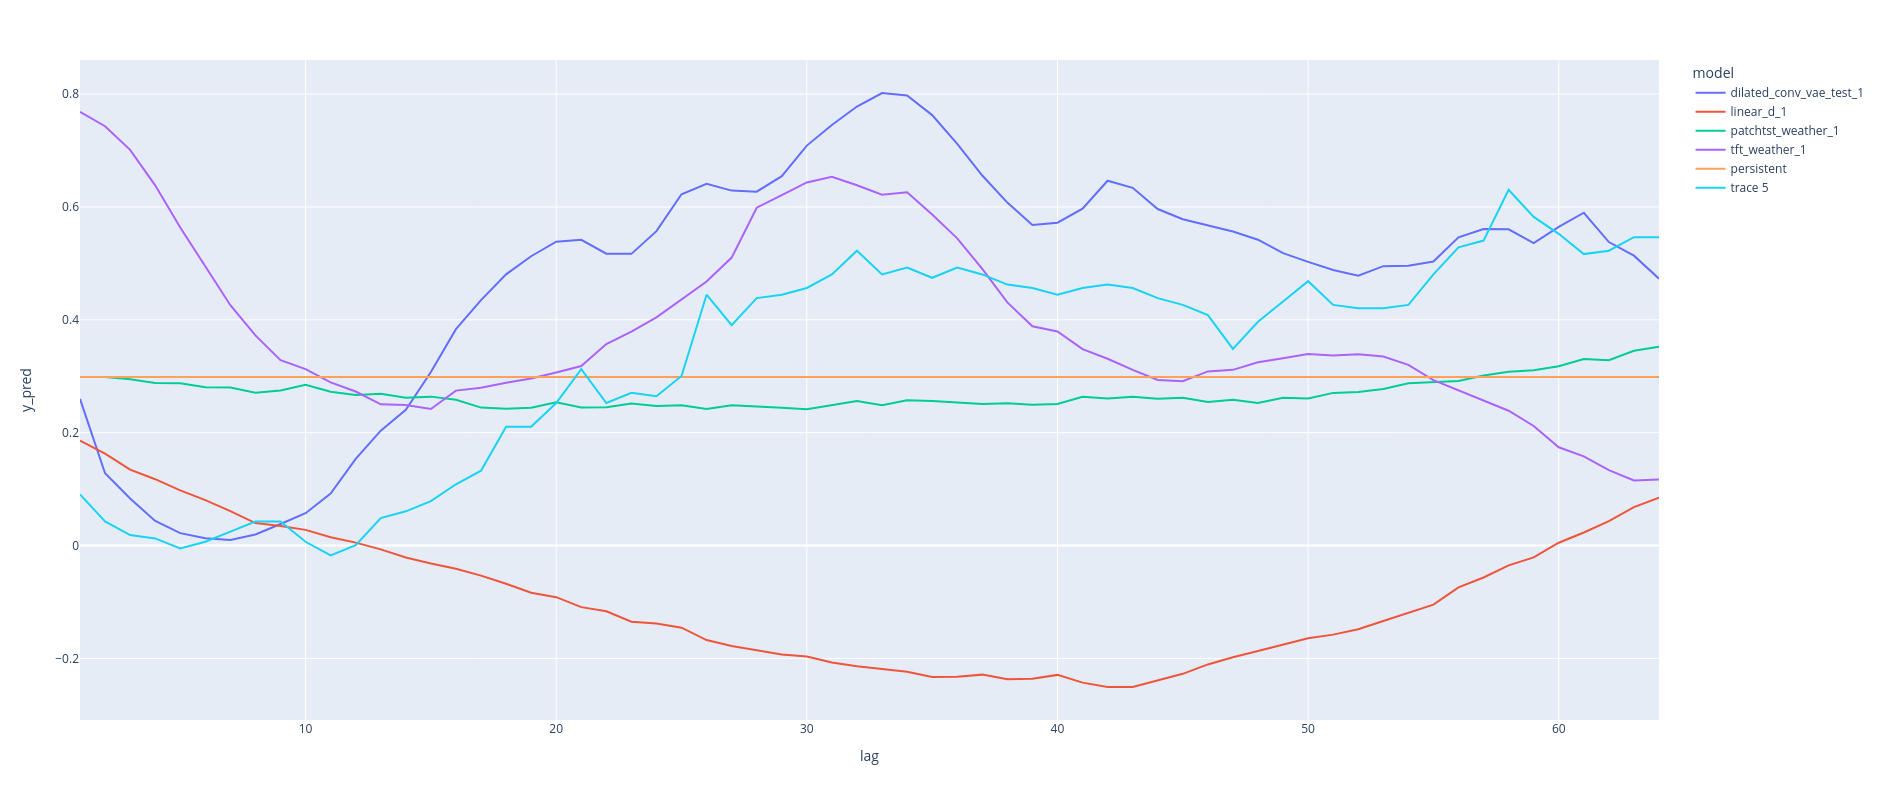

In [20]:
#27-11-2020
date  ='2020-12-19 13:20:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

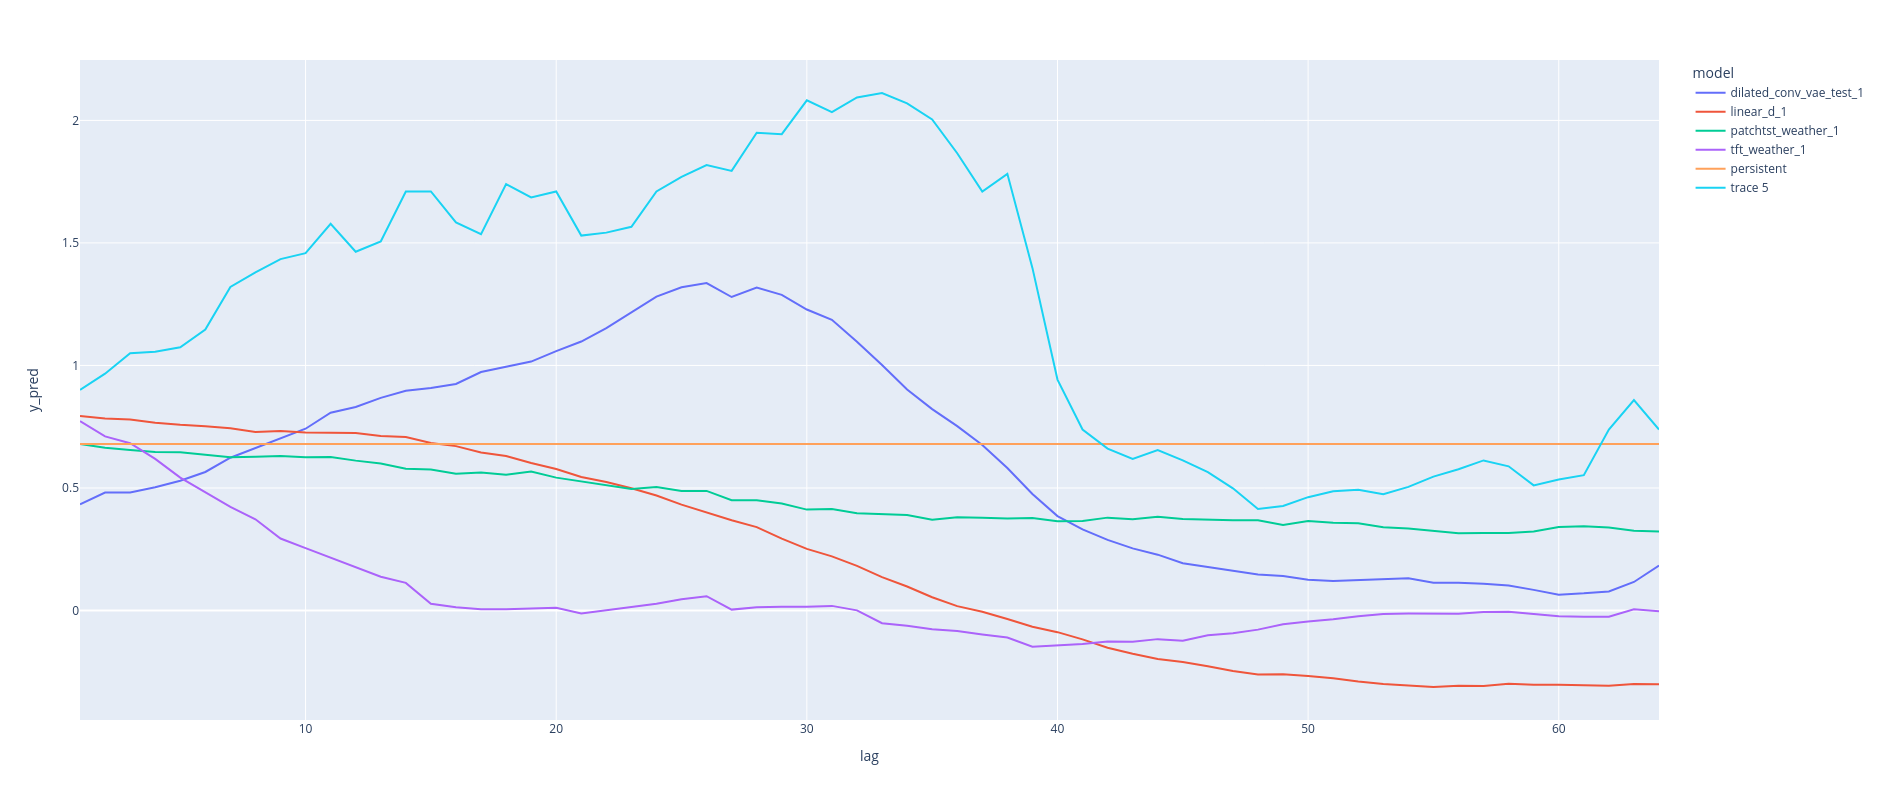

In [21]:
date  ='2020-12-08 05:30:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather_paper/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)




KeyboardInterrupt



In [ ]:
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_pred)/x.y)).reset_index().rename(columns={0:'error'}) 
fig = px.line(error, x='lag', y='error', color='model',height=600,width=1000)
fig.update_layout(legend=dict(x=0.65,y=.1),font=dict(size=16)) 
fig.write_image('error.pdf')

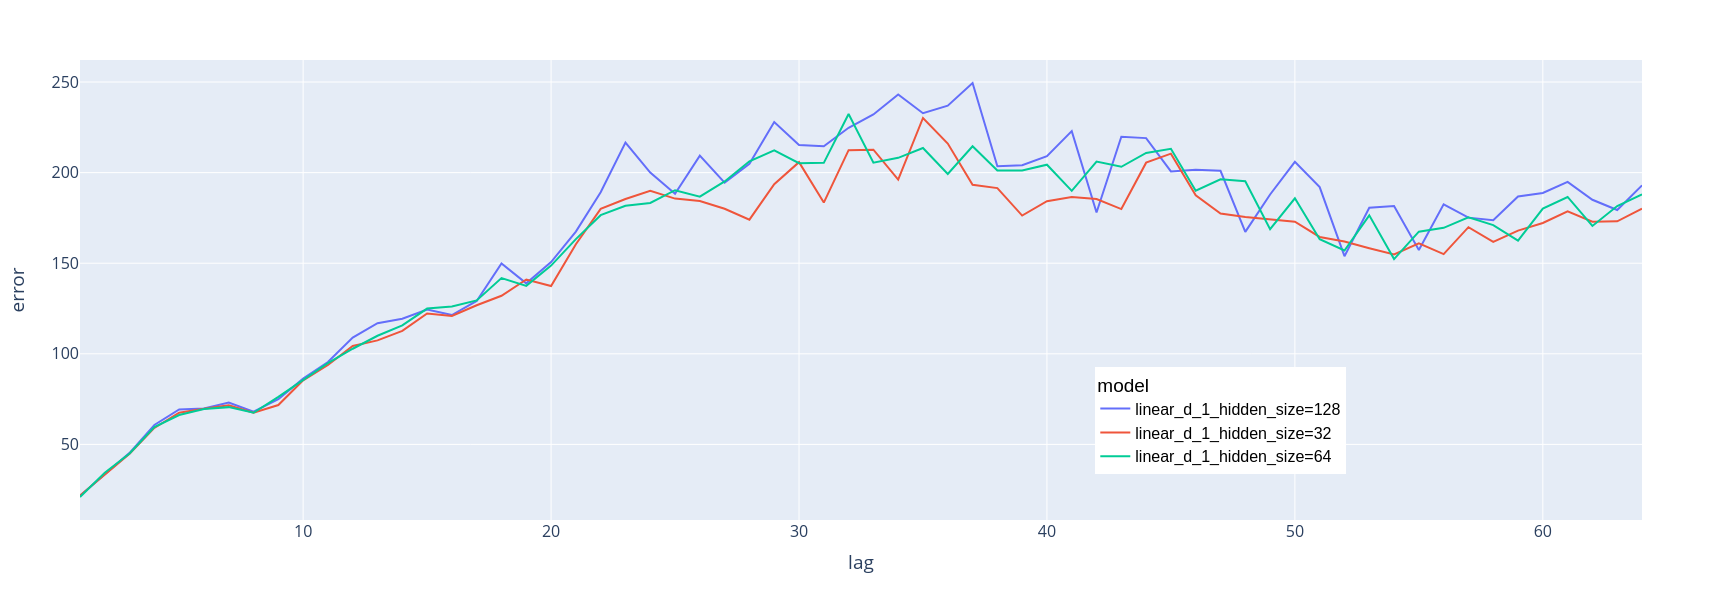